<a href="https://colab.research.google.com/github/cardstud/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/LS_DS_131_Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>

<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Lesson 1*

# Statistics, Probability and Inference

## Learning Objectives
* [Part 1](#p1): Normal Distribution Revisted
* [Part 2](#p2): Student's T Test
* [Part 3](#p3): Hypothesis Test & Doing it Live

## What is Descriptive Statistics?

<https://statistics.laerd.com/statistical-guides/descriptive-inferential-statistics.php>

In [0]:
import pandas as pd
df = pd.DataFrame({'a': [1,2,3,4,5], 'b': [2,4,6,8,10]})
df.head()

,a,b
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10


In [0]:
# How can we quickly look at some descriptive statistics of the above dataframe?

In [0]:
df.describe()

,a,b
count,5.000000,5.000000
mean,3.000000,6.000000
std,1.581139,3.162278
min,1.000000,2.000000
25%,2.000000,4.000000
50%,3.000000,6.000000
75%,4.000000,8.000000
max,5.000000,10.000000


In [0]:
df['a'].mean()

3.0

In [0]:
df['a'].min()

1

In [0]:
df['a'].max()

5

## What is Inferential Statistics?

<https://slideplayer.com/slide/5130463/16/images/2/Statistical+Inference.jpg>

## Hypothesis Testing (T-Tests)



Ever thought about how long it takes to make a pancake? Have you ever compared the tooking time of a pancake on each eye of your stove? Is the cooking time different between the different eyes? Now, we can run an experiment and collect a sample of 1,000 pancakes on one eye and another 800 pancakes on the other eye. Assumed we used the same pan, batter, and technique on both eyes. Our average cooking times were 180 (5 std) and 178.5 (4.25 std) seconds repsectively. Now, we can tell those numbers are not identicial, but how confident are we that those numbers are practically the same? How do we know the slight difference isn't caused by some external randomness?

Yes, today's lesson will help you figure out how long to cook your pancakes (*theoretically*). Experimentation is up to you; otherwise, you have to accept my data as true. How are going to accomplish this? With probability, statistics, inference and maple syrup (optional). 

<img src="https://images.unsplash.com/photo-1541288097308-7b8e3f58c4c6?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=3300&q=80" width=400>



## Normal Distribution Revisited

What is the Normal distribution: A probability distribution of a continuous real valued random-variable. The Normal distribution properties make it useful for the *Central Limit Theorm*, because if we assume a variable follows the normal distribution, we can make certain conclusions based on probabilities.

In [0]:
import numpy as np

mu = 0 # mean
sigma = 0.1 # standard deviation

sample = np.random.normal(mu, sigma, 1000)

In [0]:
sample.shape

(1000,)

In [0]:
np.mean(sample)

-0.0054056084064456255

In [0]:
mu - np.mean(sample)

0.0054056084064456255

In [0]:
# Verify the mean of our sample
abs(mu - np.mean(sample)) < 0.01

True

In [0]:
# Verify the variance of our sample
abs(sigma - np.std(sample, ddof=1)) < 0.01

True

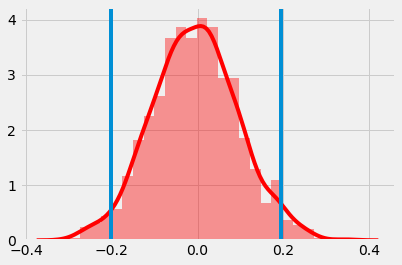

In [0]:
import seaborn as sns
from matplotlib import style

style.use('fivethirtyeight')

ax = sns.distplot(sample, color='r')
ax.axvline(np.percentile(sample,97.5),0)
ax.axvline(np.percentile(sample,2.5),0)

In [0]:
# 68-95-99 rule, empircal rule, shorthand used to remember the percentage of values that lie within a band around the mean in a normal distribution with a width of two, four and six standard deviations
# More accurately, 68.27%, 95.45% and 99.73% of the values lie within one, two, and three standard deviations of the mean.
# Empirically usefl to treat 99.7% probability as near certainty

![The Normal Distribution](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Empirical_Rule.PNG/350px-Empirical_Rule.png)

In [0]:
# Central limit theorem - https://en.wikipedia.org/wiki/Central_limit_theorem

In [0]:
# Track calories in one yaer
person1_cals = np.random.normal(2500, 100, size=365)   #(2500- mean, 100-std, size- number of days)
person1_cals

array([2521.40664794, 2513.51093629, 2590.73220332, 2501.71224899,
       2636.98450249, 2562.17426289, 2549.78690016, 2494.33165452,
       2322.92970615, 2455.02210691, 2459.98389893, 2544.32156949,
       2647.68567646, 2484.0667197 , 2638.71746871, 2434.96174033,
       2520.91789172, 2464.97925964, 2344.5955365 , 2430.28591927,
       2695.39066474, 2509.24978581, 2345.26097129, 2605.34547886,
       2540.62694952, 2440.54104402, 2669.53569715, 2492.0628171 ,
       2678.71509542, 2624.3111103 , 2569.56441681, 2580.86036884,
       2527.51575091, 2712.72457613, 2495.49663144, 2552.06751422,
       2488.9168137 , 2450.9855954 , 2400.59250809, 2585.16774352,
       2540.7076974 , 2386.08752245, 2416.48500816, 2387.78855355,
       2332.36489642, 2489.61978236, 2472.91172535, 2633.07914148,
       2568.32780128, 2571.19328131, 2508.83720898, 2581.73734108,
       2378.96459977, 2427.70106735, 2501.45617474, 2469.37767369,
       2452.91135241, 2573.85708542, 2401.98272804, 2364.51231

In [0]:
# Plot hist
import matplotlib.pyplot as plt
import seaborn as sns

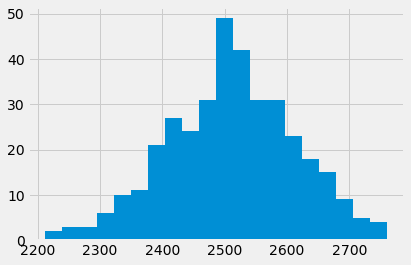

In [0]:
plt.hist(person1_cals, bins=20);

In [0]:
person1_cals.mean()

2510.306767607028

In [0]:
person1_cals.var()

10354.253924378034

In [0]:
person1_cals.std()

101.75585449682015

In [0]:
# Do same but for more people
N = 200
people_cals = [np.random.normal(2500, 100, size=365) for _ in range(N)]  # Since not using i in iteration, just put an underscore


In [0]:
people_cals

[array([2383.42466125, 2527.1239665 , 2522.28349325, 2269.2617527 ,
        2484.06043904, 2470.5316017 , 2413.04115559, 2568.77752152,
        2552.17515485, 2424.75404134, 2498.58417977, 2566.40310692,
        2507.84855498, 2522.27934434, 2491.54042512, 2373.60523946,
        2443.61250405, 2451.84247844, 2484.7327665 , 2626.60281516,
        2445.87534609, 2495.0980373 , 2417.71173417, 2860.81653769,
        2570.32509112, 2531.12960271, 2445.83121581, 2537.1072168 ,
        2612.98309306, 2433.48006578, 2358.74420502, 2459.74809116,
        2581.35541551, 2580.00054196, 2400.24841816, 2506.00038784,
        2567.95343132, 2632.06537466, 2572.59480633, 2329.59532273,
        2417.73985697, 2356.54585678, 2490.54764762, 2404.82050707,
        2352.33797911, 2444.90338696, 2479.19464524, 2575.57090522,
        2650.50742374, 2484.70572531, 2678.95724148, 2417.19522793,
        2441.05004373, 2471.5205151 , 2268.27570458, 2539.26613274,
        2546.98752583, 2510.65924824, 2494.42957

In [0]:
people_mean_cals=[person.mean() for person in people_cals]
people_mean_cals[:10]

[2496.5614026543517,
 2504.1538891609766,
 2487.77467115793,
 2493.964461182064,
 2495.588619577312,
 2503.2907294710385,
 2496.4866042696326,
 2501.541940132052,
 2507.0515950160743,
 2502.056292199846]

(array([ 3.,  2.,  4.,  2., 12., 12., 25., 18., 14., 22., 25., 20., 17.,
         4.,  6.,  6.,  4.,  3.,  0.,  1.]),
 array([2486.56910174, 2488.00592016, 2489.44273859, 2490.87955701,
        2492.31637543, 2493.75319386, 2495.19001228, 2496.6268307 ,
        2498.06364913, 2499.50046755, 2500.93728597, 2502.37410439,
        2503.81092282, 2505.24774124, 2506.68455966, 2508.12137809,
        2509.55819651, 2510.99501493, 2512.43183336, 2513.86865178,
        2515.3054702 ]),
 <a list of 20 Patch objects>)

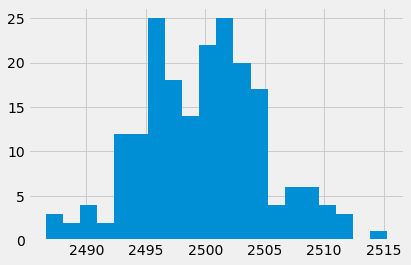

In [0]:
# visualize above list
plt.hist(people_mean_cals, bins=20)

# Why do we use the t-distribution in hypothesis tests?

![t-distribution-low-dof](https://lambdachops.com/img/t-distribution-low-dof.png)

![t-distribution-approximates-normal](https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/t-distribution-approximates-normal.png?raw=true)

### Helpful video on why we use the t-distribution

<https://www.youtube.com/watch?v=Uv6nGIgZMVw>

However, in order to understand it you'll need to understand what a z-score is:

A z-score calculates the number of standard deviations an observations lies from the population mean. The problem is that in real-world situations, we don't know what the sample mean is, so we have to turn to using the sample mean to estimate the population mean. Because the sample mean is generated from a sample and used to estimate the population mean with some level of uncertainty, it also has its own distribution a nd spread. This means that for low sample sizes both our estimates of the sample mean and sample population are not very precise, they're kind of spread out. It's this spread that makes the t-distribution wider than the normal distribution for low sample sizes. However, with the larger the sample size, the closer the t-distribution approximates the normal distribution.


## Student's T Test

>Assuming data come from a Normal distribution, the t test provides a way to test whether the sample mean (that is the mean calculated from the data) is a good estimate of the population mean. 

The derivation of the t-distribution was first published in 1908 by William Gosset while working for the Guinness Brewery in Dublin. Due to proprietary issues, he had to publish under a pseudonym, and so he used the name Student.

The t-distribution is essentially a distribution of means of normaly distributed data. When we use a t-statistic, we are  checking that a mean fails within a certain $\alpha$ probability of the mean of means.

In [0]:
# one with 10 DF, 100 DF, 1000 DF
t_df10 = np.random.standard_t(df=10, size=10)
t_df100 = np.random.standard_t(df=100, size=100)
t_df1000 = np.random.standard_t(df=1000, size=1000)

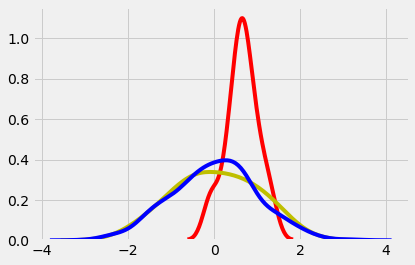

In [0]:
sns.kdeplot(t_df10, color='r');
sns.kdeplot(t_df100, color='y');
sns.kdeplot(t_df1000, color='b');

In [0]:
# Put in a list and iterate them and computer mean, std, var
i = 10
for sample in [t_df10, t_df100, t_df1000]:
    print(f"t - distribution with {i} degrees of freedom")
    print("---" * 10)
    print(f"Mean: {sample.mean()}")
    print(f"Standard Deviation: {sample.std()}")
    print(f"Variance: {sample.var()}")
    i = i*10

t - distribution with 10 degrees of freedom
------------------------------
Mean: 0.6516777735512037
Standard Deviation: 0.3572931673612969
Variance: 0.12765840744306772
t - distribution with 100 degrees of freedom
------------------------------
Mean: 0.03800745649518894
Standard Deviation: 0.9814899088265782
Variance: 0.9633224411284048
t - distribution with 1000 degrees of freedom
------------------------------
Mean: 0.013534018350859501
Standard Deviation: 1.0002677743164778
Variance: 1.0005356203360403


In [0]:
# Old way
print('text1' +  ' ' + 'text2')

text1 text2


In [0]:
# another way

In [0]:
a = 3.0
print('my number is %s' %a)

my number is 3.0


In [0]:
print('my number is {}'.format(a))

my number is 3.0


In [0]:
# Most preferable way to do it
print(f'my number is {a}')

my number is 3.0


In [0]:
#print(f'my number is {a} ---watch video for what you missed

Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test. We will also dig a bit deeper into how the test statistic is calculated based on the sample error, and visually what it looks like to have 1 or 2 "tailed" t-tests.

In [0]:
# TODO - during class, but please help!
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

In [0]:
#Our average cooking times were 180 (5 std) and 178.5 (4.25 std) seconds repsectively.

In [0]:
mu1 = 180
sigma1 = 5
n1 = 1000
sample1 = np.random.normal(size=n1, scale=sigma1, loc=mu1)  # can pass parameters in any order if you name them, otherwise must be in order if not named

In [0]:
sample1[:10]

array([177.74555949, 173.26686572, 179.08597149, 182.16462001,
       182.20482725, 177.05366696, 173.53267574, 174.52645323,
       180.00311829, 183.57504058])

In [0]:
# other sample up in notebook to remove it here so can use
del sample

In [0]:
# 2nd one
mu2 = 178.5
sigma2 = 4.25
n2 = 800
sample2 = np.random.normal(scale=sigma2, loc=mu2, size=n2)

In [0]:
sample2[:10]

array([176.99995542, 180.77062193, 178.41309533, 181.52721369,
       180.01796682, 177.13905729, 176.86796259, 175.10055337,
       174.91989415, 180.7203373 ])

In [0]:
# plot
import seaborn as sns

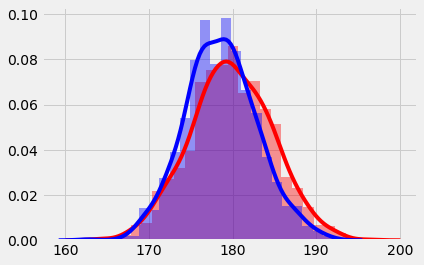

In [0]:
sns.distplot(sample1, color='r')
sns.distplot(sample2, color='b');

# The four parts of t-tests

- Null hypothesis (formulate before you do any testing, aka status quo, boring hypothesis), $\mu1 == \mu2$
- Alternative hypothesis: e.g. $\mu1 =/=  \mu2$ (not equal to each other)
- t-statistic
- p-value

In [0]:
# from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

In [0]:
ttest_ind(sample1, sample2)

Ttest_indResult(statistic=5.510286653254367, pvalue=4.100407741759789e-08)

In [0]:
# if pvalue is lower than threshold, you reject null hypothesis - however, still a possibility you might be wrong though
# if pvalue greater than threshold, you can accept null hypothesis

In [0]:
pvalue_list = []

for _ in range(100):
  mu1 = 180
  sigma1 = 5
  n1 = 100
  sample1 = np.random.normal(mu1, sigma1, size=n1)
  mu2 = 180
  sigma2 = 5
  n2 = 100
  sample2 = np.random.normal(mu2, sigma2, size=n2)
  _, pvalue = ttest_ind(sample1, sample2)
  pvalue_list.append(pvalue)

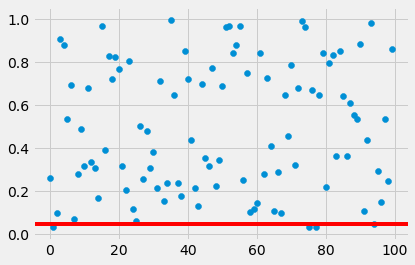

In [0]:
plt.scatter(list(range(100)), pvalue_list);
plt.axhline(y=0.05, color='r');               # .05 is literature but in real world, lot lower

In [0]:
# points above line means failing to reject the Null hypothesis
# points below red line means we are rejecting the Null hypothesis

In [0]:
pvalue_arr = np.array(pvalue_list)
pvalue_arr > 0.05

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True])

In [0]:
np.sum(pvalue_arr > 0.05)

96

### Type 1 vs Type II Errors
https://en.wikipedia.org/wiki/Type_I_and_type_II_errors

# Test Statistic

https://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-is-a-t-test-and-why-is-it-like-telling-a-kid-to-clean-up-that-mess-in-the-kitchen

https://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-t-values-and-p-values-in-statistics

# P-value
https://stats.stackexchange.com/questions/166323/misunderstanding-a-p-value

# One-Tailed vs two-tailed
https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/

https://www.youtube.com/watch?v=VP1bhopNP74

# One sample vs two sample
https://web.ma.utexas.edu/users/mks/statmistakes/2samplevs1sampletest.html

In [0]:
from google.colab import files
uploaded = files.upload()

Saving master.csv to master (1).csv


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('master.csv')

In [0]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [0]:
df.shape

(27820, 12)

In [0]:
df['year'].max()

2016

In [0]:
df['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [0]:
df_2016 = df[df['year'] ==2016]
df_2016.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
1248,Armenia,2016,male,75+ years,12,61956,19.37,Armenia2016,NaN,"10,546,135,160",3788,Silent
1249,Armenia,2016,male,55-74 years,16,237813,6.73,Armenia2016,NaN,"10,546,135,160",3788,Boomers
1250,Armenia,2016,male,35-54 years,16,350633,4.56,Armenia2016,NaN,"10,546,135,160",3788,Generation X
1251,Armenia,2016,male,15-24 years,5,202220,2.47,Armenia2016,NaN,"10,546,135,160",3788,Millenials
1252,Armenia,2016,female,75+ years,2,102414,1.95,Armenia2016,NaN,"10,546,135,160",3788,Silent


In [0]:
df_2016.shape

(160, 12)

In [0]:
df_2016['country'].unique()

array(['Armenia', 'Austria', 'Croatia', 'Cyprus', 'Czech Republic',
       'Grenada', 'Hungary', 'Iceland', 'Lithuania', 'Mauritius',
       'Mongolia', 'Netherlands', 'Qatar', 'Romania', 'Sweden',
       'Thailand'], dtype=object)

In [0]:
df_male = df_2016[df_2016['sex'] == 'male']
df_female = df_2016[df_2016['sex'] == 'female']

In [0]:
df_male.shape

(80, 12)

In [0]:
df_female.shape

(80, 12)

In [0]:
df_female_group = df_female.groupby(['country', 'age']).mean()

In [0]:
df_female_group

year  suicides_no  ...  HDI for year  gdp_per_capita ($)
country        age                             ...                                  
Armenia        15-24 years  2016            1  ...           NaN                3788
               25-34 years  2016            2  ...           NaN                3788
               35-54 years  2016            3  ...           NaN                3788
               55-74 years  2016            6  ...           NaN                3788
               75+ years    2016            2  ...           NaN                3788
Austria        15-24 years  2016           22  ...           NaN               46976
               25-34 years  2016           18  ...           NaN               46976
               35-54 years  2016           95  ...           NaN               46976
               55-74 years  2016           99  ...           NaN               46976
               75+ years    2016           61  ...           NaN               46976
Croatia        15-24 years  2016            6  ...           NaN               12905
               25-34 years  2016            6  ...           NaN               12905
               35-54 years  2016           47  ...           NaN               12905
               55-74 years  2016           69  ...           NaN               12905
               75+ years    2016           40  ...           NaN               12905
Cyprus         15-24 years  2016            0  ...           NaN               25098
               25-34 years  2016            1  ...           NaN               25098
               35-54 years  2016            3  ...           NaN               25098
               55-74 years  2016            1  ...           NaN               25098
               75+ years    2016            0  ...           NaN               25098
Czech Republic 15-24 years  2016           22  ...           NaN               19505
               25-34 years  2016           34  ...           NaN               19505
               35-54 years  2016           91  ...           NaN               19505
               55-74 years  2016           86  ...           NaN               19505
               75+ years    2016           25  ...           NaN               19505
Grenada        15-24 years  2016            0  ...           NaN               10838
               25-34 years  2016            0  ...           NaN               10838
               35-54 years  2016            0  ...           NaN               10838
               55-74 years  2016            0  ...           NaN               10838
               75+ years    2016            0  ...           NaN               10838
...                          ...          ...  ...           ...                 ...
Mongolia       15-24 years  2016           18  ...           NaN                4145
               25-34 years  2016           15  ...           NaN                4145
               35-54 years  2016           15  ...           NaN                4145
               55-74 years  2016            1  ...           NaN                4145
               75+ years    2016            3  ...           NaN                4145
Netherlands    15-24 years  2016           35  ...           NaN               48108
               25-34 years  2016           65  ...           NaN               48108
               35-54 years  2016          217  ...           NaN               48108
               55-74 years  2016          209  ...           NaN               48108
               75+ years    2016           87  ...           NaN               48108
Qatar          15-24 years  2016            0  ...           NaN               62484
               25-34 years  2016            2  ...           NaN               62484
               35-54 years  2016            3  ...           NaN               62484
               55-74 years  2016            0  ...           NaN               62484
               75+ years    2016 

In [0]:
df_male_group = df_male.groupby(['country', 'age']).mean()

In [0]:
df_male_group

year  suicides_no  ...  HDI for year  gdp_per_capita ($)
country        age                             ...                                  
Armenia        15-24 years  2016            5  ...           NaN                3788
               25-34 years  2016            4  ...           NaN                3788
               35-54 years  2016           16  ...           NaN                3788
               55-74 years  2016           16  ...           NaN                3788
               75+ years    2016           12  ...           NaN                3788
Austria        15-24 years  2016           58  ...           NaN               46976
               25-34 years  2016           86  ...           NaN               46976
               35-54 years  2016          260  ...           NaN               46976
               55-74 years  2016          290  ...           NaN               46976
               75+ years    2016          212  ...           NaN               46976
Croatia        15-24 years  2016           30  ...           NaN               12905
               25-34 years  2016           48  ...           NaN               12905
               35-54 years  2016          146  ...           NaN               12905
               55-74 years  2016          187  ...           NaN               12905
               75+ years    2016          104  ...           NaN               12905
Cyprus         15-24 years  2016            5  ...           NaN               25098
               25-34 years  2016            2  ...           NaN               25098
               35-54 years  2016           15  ...           NaN               25098
               55-74 years  2016            7  ...           NaN               25098
               75+ years    2016            2  ...           NaN               25098
Czech Republic 15-24 years  2016           78  ...           NaN               19505
               25-34 years  2016          137  ...           NaN               19505
               35-54 years  2016          386  ...           NaN               19505
               55-74 years  2016          319  ...           NaN               19505
               75+ years    2016          140  ...           NaN               19505
Grenada        15-24 years  2016            0  ...           NaN               10838
               25-34 years  2016            0  ...           NaN               10838
               35-54 years  2016            0  ...           NaN               10838
               55-74 years  2016            0  ...           NaN               10838
               75+ years    2016            0  ...           NaN               10838
...                          ...          ...  ...           ...                 ...
Mongolia       15-24 years  2016           85  ...           NaN                4145
               25-34 years  2016          127  ...           NaN                4145
               35-54 years  2016          127  ...           NaN                4145
               55-74 years  2016           29  ...           NaN                4145
               75+ years    2016            3  ...           NaN                4145
Netherlands    15-24 years  2016           77  ...           NaN               48108
               25-34 years  2016          159  ...           NaN               48108
               35-54 years  2016          478  ...           NaN               48108
               55-74 years  2016          436  ...           NaN               48108
               75+ years    2016          123  ...           NaN               48108
Qatar          15-24 years  2016           13  ...           NaN               62484
               25-34 years  2016           21  ...           NaN               62484
               35-54 years  2016           27  ...           NaN               62484
               55-74 years  2016            2  ...           NaN               62484
               75+ years    2016 

In [0]:
df_female_group = df_female.groupby(['country', 'age'], as_index=False).mean().groupby('country')['suicides/100k pop'].mean()

In [0]:
df_female_group

year  suicides_no  ...  HDI for year  gdp_per_capita ($)
country        age                             ...                                  
Armenia        15-24 years  2016            1  ...           NaN                3788
               25-34 years  2016            2  ...           NaN                3788
               35-54 years  2016            3  ...           NaN                3788
               55-74 years  2016            6  ...           NaN                3788
               75+ years    2016            2  ...           NaN                3788
Austria        15-24 years  2016           22  ...           NaN               46976
               25-34 years  2016           18  ...           NaN               46976
               35-54 years  2016           95  ...           NaN               46976
               55-74 years  2016           99  ...           NaN               46976
               75+ years    2016           61  ...           NaN               46976
Croatia        15-24 years  2016            6  ...           NaN               12905
               25-34 years  2016            6  ...           NaN               12905
               35-54 years  2016           47  ...           NaN               12905
               55-74 years  2016           69  ...           NaN               12905
               75+ years    2016           40  ...           NaN               12905
Cyprus         15-24 years  2016            0  ...           NaN               25098
               25-34 years  2016            1  ...           NaN               25098
               35-54 years  2016            3  ...           NaN               25098
               55-74 years  2016            1  ...           NaN               25098
               75+ years    2016            0  ...           NaN               25098
Czech Republic 15-24 years  2016           22  ...           NaN               19505
               25-34 years  2016           34  ...           NaN               19505
               35-54 years  2016           91  ...           NaN               19505
               55-74 years  2016           86  ...           NaN               19505
               75+ years    2016           25  ...           NaN               19505
Grenada        15-24 years  2016            0  ...           NaN               10838
               25-34 years  2016            0  ...           NaN               10838
               35-54 years  2016            0  ...           NaN               10838
               55-74 years  2016            0  ...           NaN               10838
               75+ years    2016            0  ...           NaN               10838
...                          ...          ...  ...           ...                 ...
Mongolia       15-24 years  2016           18  ...           NaN                4145
               25-34 years  2016           15  ...           NaN                4145
               35-54 years  2016           15  ...           NaN                4145
               55-74 years  2016            1  ...           NaN                4145
               75+ years    2016            3  ...           NaN                4145
Netherlands    15-24 years  2016           35  ...           NaN               48108
               25-34 years  2016           65  ...           NaN               48108
               35-54 years  2016          217  ...           NaN               48108
               55-74 years  2016          209  ...           NaN               48108
               75+ years    2016           87  ...           NaN               48108
Qatar          15-24 years  2016            0  ...           NaN               62484
               25-34 years  2016            2  ...           NaN               62484
               35-54 years  2016            3  ...           NaN               62484
               55-74 years  2016            0  ...           NaN               62484
               75+ years    2016 

In [0]:
df_female[df_female['country'] == 'Netherlands']['suicides/100k pop'].mean()

8.065999999999999

In [0]:
df_female[df_female['country'] == 'Armenia']['suicides/100k pop'].mean()

1.174

In [0]:
df_male_group = df_male.groupby(['country', 'age'], as_index=False).mean().groupby('country')['suicides/100k pop'].mean()
df_male_group

country
Armenia            6.938
Austria           29.126
Croatia           34.338
Cyprus             8.418
Czech Republic    27.008
Grenada            0.000
Hungary           38.062
Iceland           24.678
Lithuania         63.428
Mauritius         17.300
Mongolia          31.242
Netherlands       17.412
Qatar              2.710
Romania           19.760
Sweden            19.564
Thailand          12.396
Name: suicides/100k pop, dtype: float64

In [0]:
df_male[df_male['country'] == 'Netherlands']['suicides/100k pop'].mean()

17.412

In [0]:
df_male[df_male['country'] == 'Armenia']['suicides/100k pop'].mean()

6.938000000000001

In [0]:
# ttest
ttest_ind(df_female_group, df_male_group)

Ttest_indResult(statistic=-4.2791492382884435, pvalue=0.00017639850827717496)

In [0]:
# equa_val: if True, perofrm a standard independent 2 sample test that assumes equal population variances
#           if False, perform Welch's t-test, which does not assume equal population variance
ttest_ind(df_female_group, df_male_group, equal_var=True)  

Ttest_indResult(statistic=-4.2791492382884435, pvalue=0.00017639850827717496)

In [0]:
ttest_ind(df_female_group, df_male_group, equal_var=False) 

Ttest_indResult(statistic=-4.2791492382884435, pvalue=0.0005475986477063533)

# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars
- https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/two-sample-t-test-for-difference-of-means